### Importing librairies and dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
sns.set(rc={'figure.figsize':(10,5)})

In [2]:
df = pd.read_csv('ds_salaries.csv')

### Understanding the dataset

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
df.shape

(607, 12)

In [7]:
features = list(df.drop(["salary_in_usd", "Unnamed: 0"], axis=1).columns)
print("Variables indépendantes : ", features)

print("------------------------------------------------------------------")

target = "salary_in_usd"
print("Variable à prédire : ", target)

Variables indépendantes :  ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
------------------------------------------------------------------
Variable à prédire :  salary_in_usd


### Data cleaning

In [8]:
df.drop(columns=['Unnamed: 0', 'salary_currency', 'salary' ], axis=1, inplace=True)

In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

In [11]:
df['employment_type'] = df['employment_type'].replace('PT','Part-time')
df['employment_type'] = df['employment_type'].replace('FT','Full-time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

### Exploratory Data Analysis

#### Salary

In [12]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

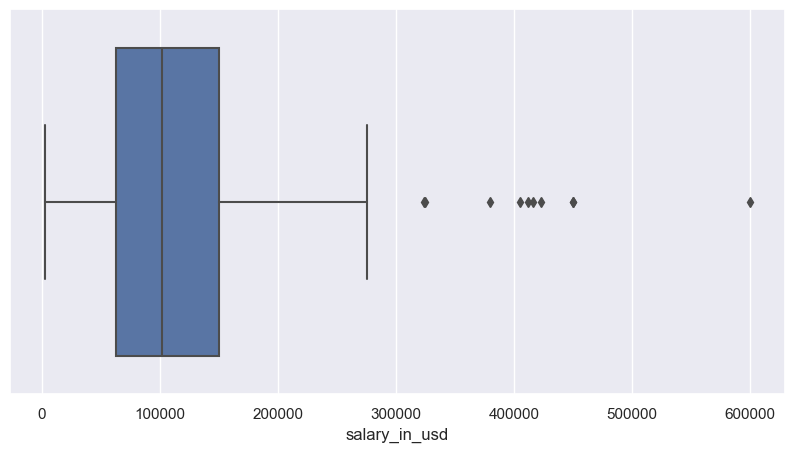

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='salary_in_usd')
plt.show()

#### Job title

<AxesSubplot:title={'center':'Number of workers per job'}>

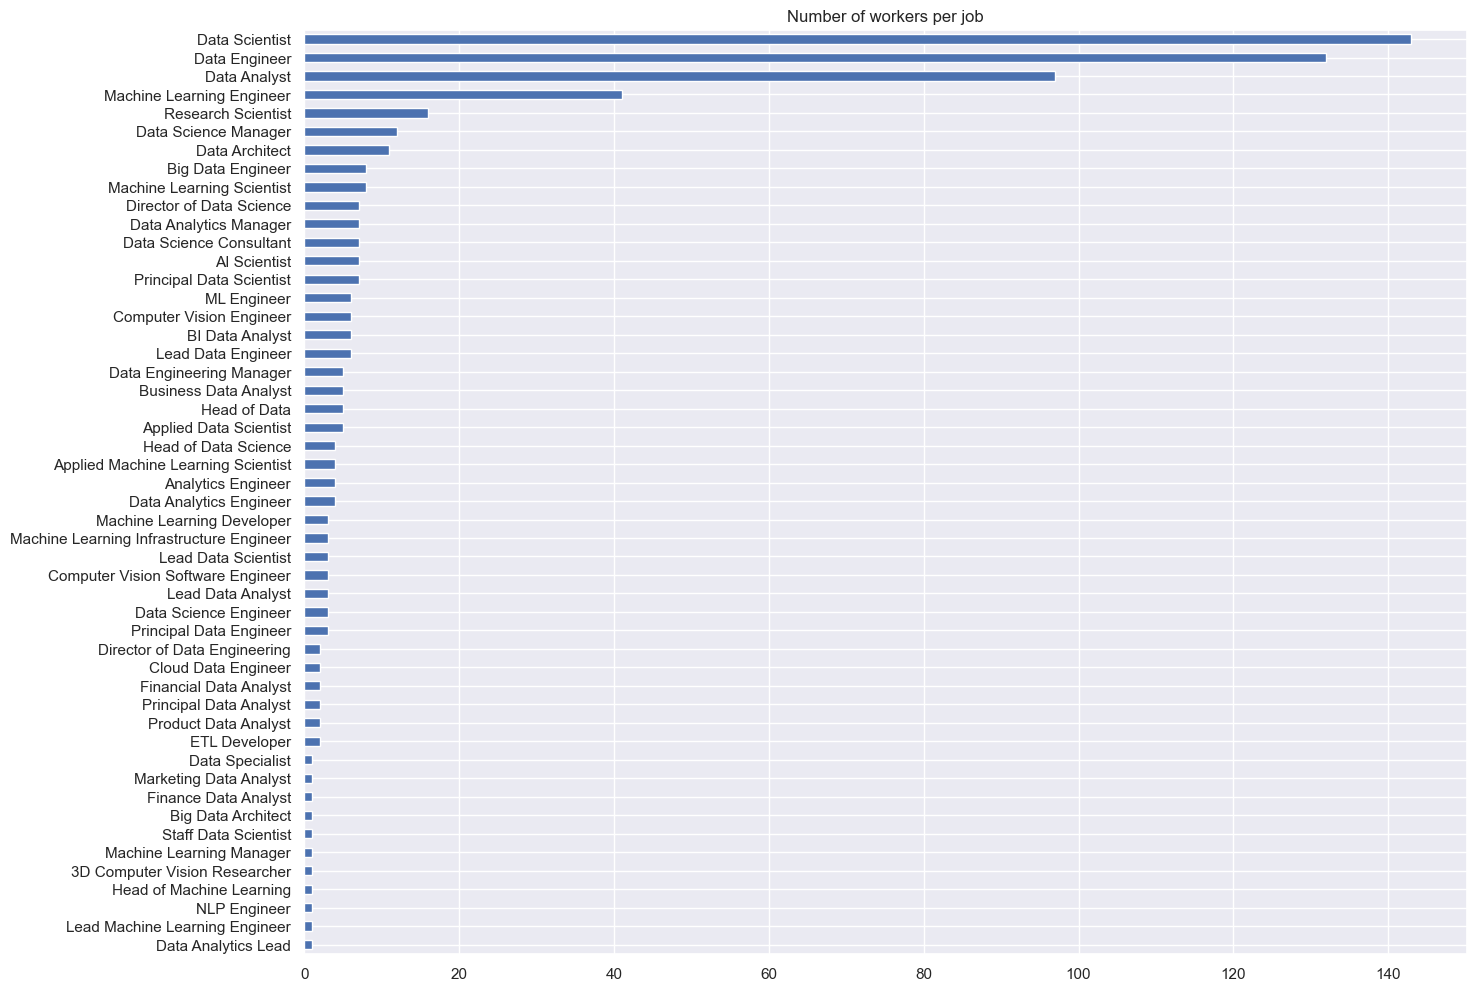

In [14]:
df['job_title'].value_counts().sort_values().plot(kind='barh', title='Number of workers per job', figsize=(15,12))

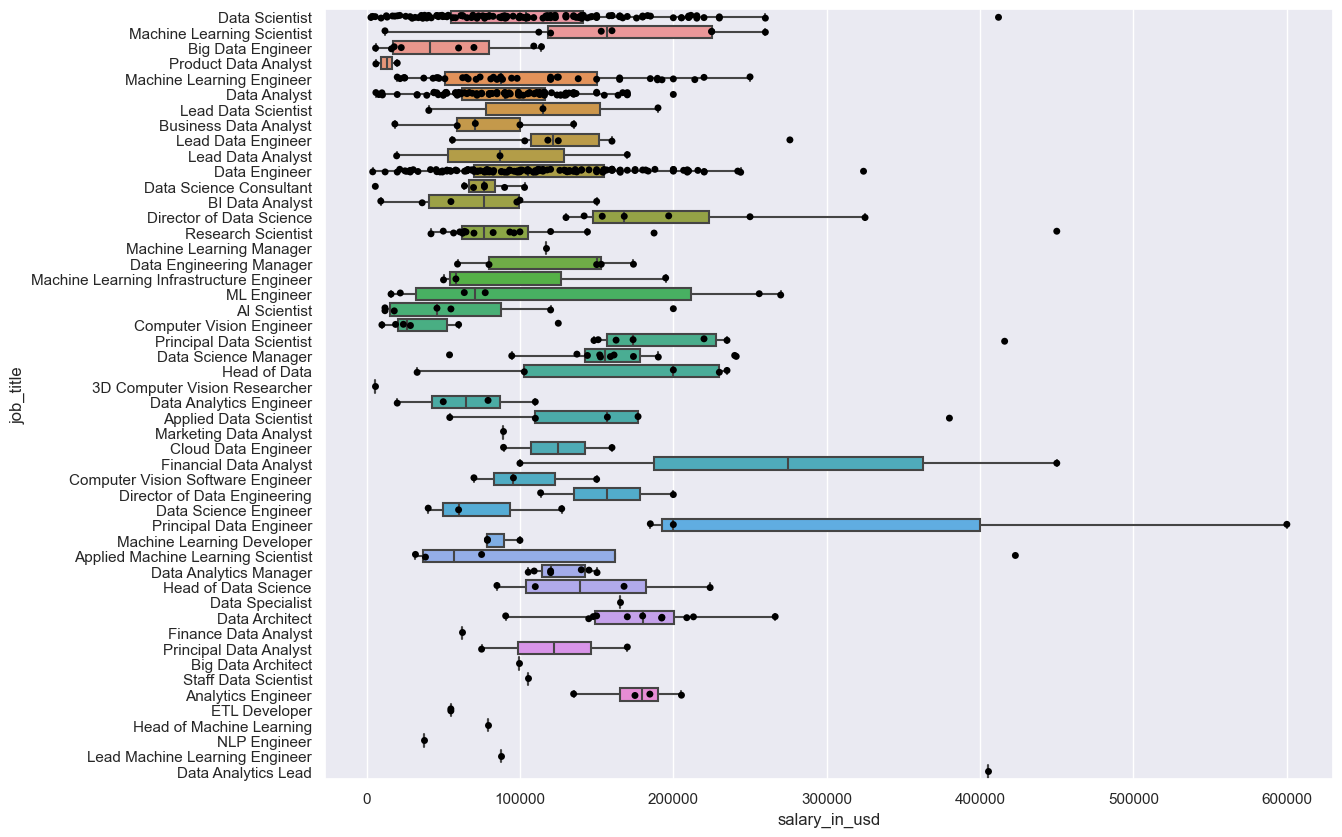

In [15]:
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y='job_title', x='salary_in_usd', data=df, showfliers=False, ax=ax)
sns.stripplot(y='job_title', x='salary_in_usd', data=df, jitter=True, color='black', ax=ax)
plt.show()

#### Experience level

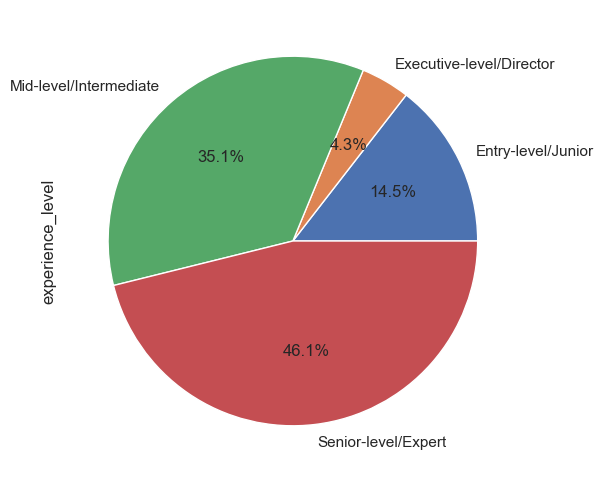

In [16]:
df.groupby('experience_level')['experience_level'].count().plot.pie(autopct="%1.1f%%", figsize=(10,6));

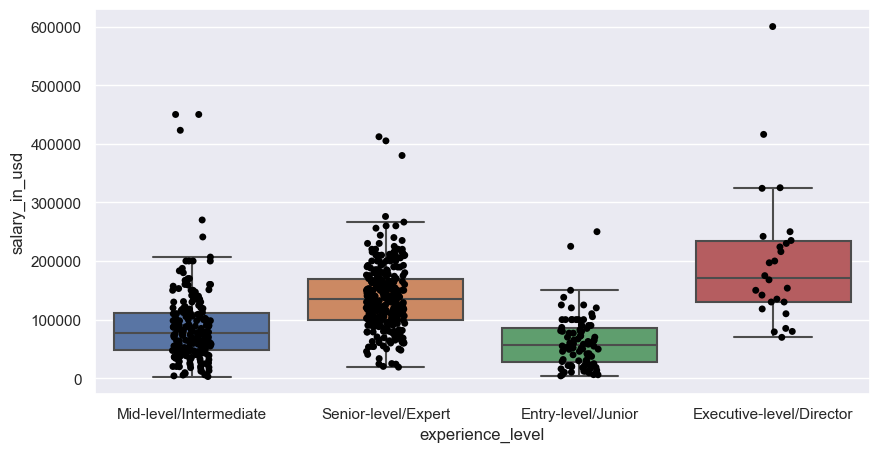

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, showfliers=False, ax=ax)
sns.stripplot(x='experience_level', y='salary_in_usd', data=df, jitter=True, color='black', ax=ax)
plt.show()

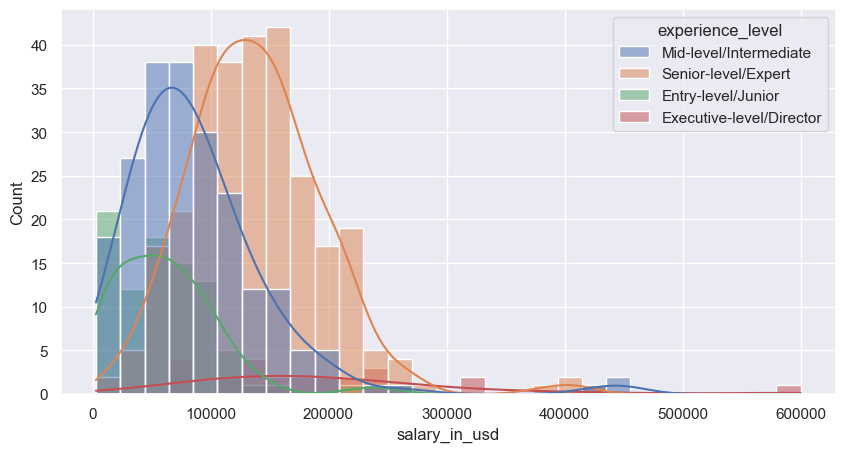

In [18]:
sns.histplot(data=df, x="salary_in_usd",kde=True,hue='experience_level');

#### Location

<AxesSubplot:xlabel='count', ylabel='employee_residence'>

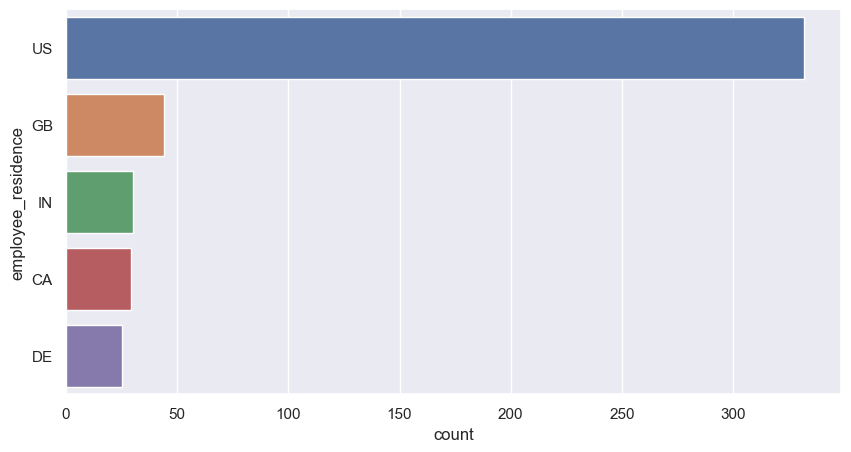

In [19]:
sns.countplot(y=df['employee_residence'],order=df['employee_residence'].value_counts().head().index)

<AxesSubplot:xlabel='count', ylabel='company_location'>

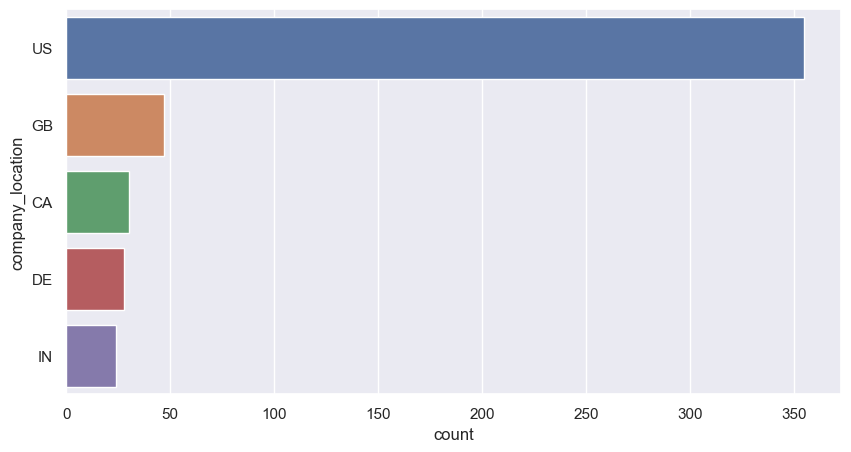

In [20]:
sns.countplot(y=df['company_location'],order=df['company_location'].value_counts().head().index)

#### Work Year

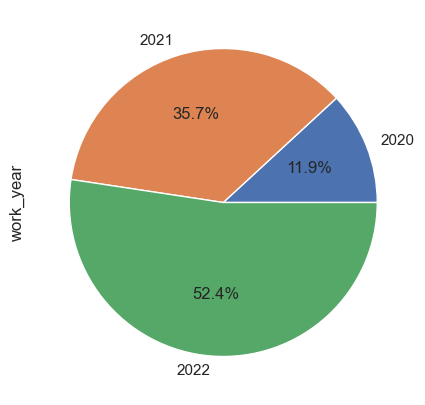

In [21]:
df.groupby('work_year')['work_year'].count().plot.pie(autopct="%1.1f%%");

Text(0.5, 1.0, 'Salary changes in the last three years')

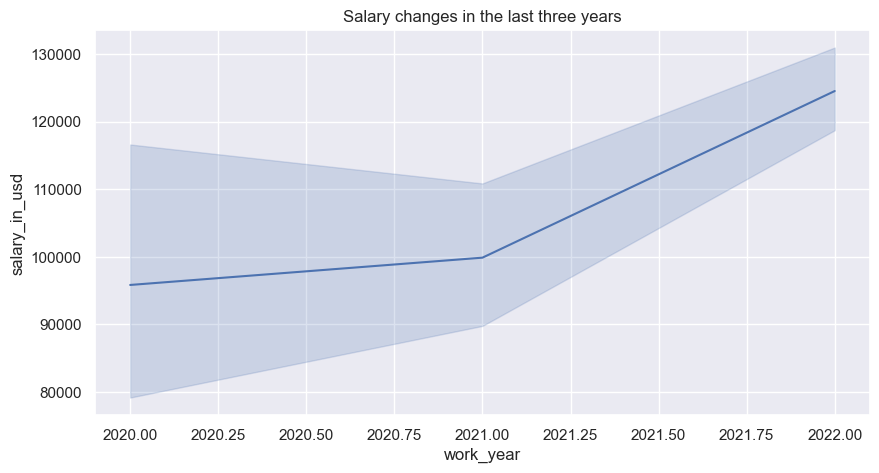

In [22]:
sns.lineplot(df['work_year'], df['salary_in_usd'])
plt.title("Salary changes in the last three years")

#### Employment type

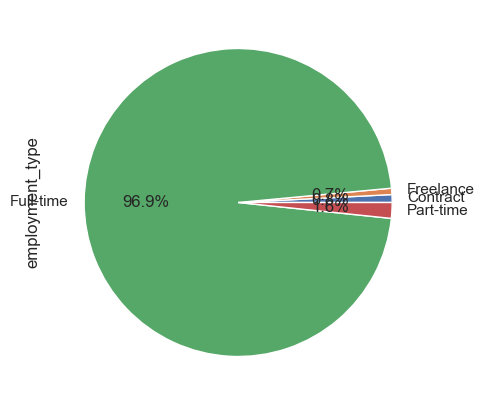

In [23]:
df.groupby('employment_type')['employment_type'].count().plot.pie(autopct="%1.1f%%");

#### Remote ratio

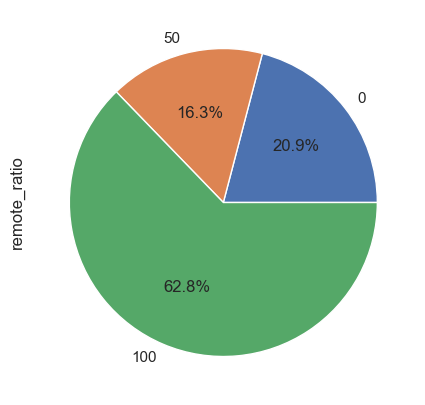

In [24]:
df.groupby('remote_ratio')['remote_ratio'].count().plot.pie(autopct="%1.1f%%");

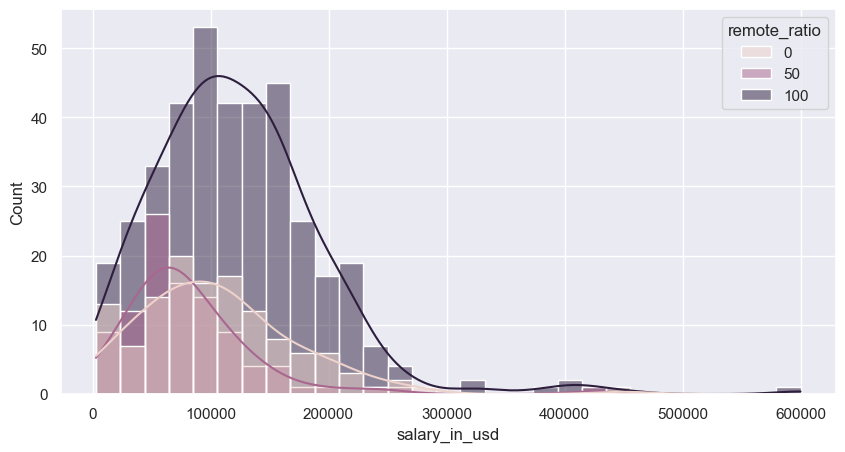

In [25]:
sns.histplot(data=df, x="salary_in_usd",kde=True,hue='remote_ratio');

##  Feature engineering 

In [26]:
df.sample()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
584,2022,Senior-level/Expert,Full-time,Data Analyst,105000,US,100,US,M


#### Experience level


In [27]:
experience = {
    'Entry-level/Junior': 0, 
    'Mid-level/Intermediate': 1, 
    'Senior-level/Expert': 2, 
    'Executive-level/Director': 3
}

In [28]:
df['experience_level'] = df['experience_level'].map(experience)

#### Job title

In [29]:
def replace_title(x):
    if ( x.find('Data Science')>=0  or  x.find('Data Scientist')>=0   ):
        df['job_title'].replace(x,'Data Scientist',inplace = True)
    elif ( x.find('Analyst')>=0  or  x.find('Analytics')>=0 ): 
        df['job_title'].replace(x,'Data Analyst',inplace = True)
    elif ( x.find('ML')>=0  or  x.find('Machine Learning')>=0 ) :
        df['job_title'].replace(x,'Machine Learning Engineer',inplace = True) 
    elif ( x.find('Data Engineer')>=0  or  x.find('Data Engineering')>=0 ):
        df['job_title'].replace(x,'Data Engineer', inplace = True)

In [30]:
jobs = ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Engineer']

for i in df['job_title']:
    replace_title(i)
    
df = df[df['job_title'].isin(jobs)]

In [31]:
df['job_title'].value_counts()

Data Scientist               192
Data Engineer                158
Data Analyst                 135
Machine Learning Engineer     68
Name: job_title, dtype: int64

#### Size

In [32]:
size = {
    'S': 0,
    'M': 1,
    'L': 2
}

In [33]:
df['company_size'] = df['company_size'].map(size)

#### Employee residence & Company location

In [34]:
def replace_location(x):
    locations = ['US', 'GB', 'CA', 'DE', 'IN']
    if x in locations:
        return x
    else:
        return 'Other'

In [35]:
df['employee_residence'] = df['employee_residence'].apply(replace_location)

In [36]:
df['company_location'] = df['company_location'].apply(replace_location)

In [37]:
df.sample()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
53,2020,0,Full-time,Data Engineer,54742,Other,100,DE,2



## Preprocessing


In [38]:
nums = df.select_dtypes(exclude="object").columns
nums

Index(['work_year', 'experience_level', 'salary_in_usd', 'remote_ratio',
       'company_size'],
      dtype='object')

In [39]:
cats = df.select_dtypes(include="object").columns
cats

Index(['employment_type', 'job_title', 'employee_residence',
       'company_location'],
      dtype='object')

In [40]:
df = pd.get_dummies(df, columns=cats, drop_first=True)

In [41]:
df.sample()

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,job_title_Data Engineer,job_title_Data Scientist,...,employee_residence_DE,employee_residence_GB,employee_residence_IN,employee_residence_Other,employee_residence_US,company_location_DE,company_location_GB,company_location_IN,company_location_Other,company_location_US
516,2022,2,152500,100,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1


### Training the model

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop(['salary_in_usd'], axis=1)
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

models = {
    "Linear regression": LinearRegression(),
    "KNeighbors": KNeighborsRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor()
}

In [45]:
results = {
    "Model":[],
    "Train Score":[],
    "Test Score":[],
    "R2":[],
    "MAE":[],
    "MSE":[],
    "RMSE":[]
}

In [46]:
def get_scores(y_test, pred) -> dict:
    scores = {
        'R2': round(r2_score(y_test, pred), 2),
        'MAE': round(mean_absolute_error(y_test, pred), 2),
        'MSE': round(mean_squared_error(y_test, pred), 2),
        'RMSE': round(sqrt(mean_squared_error(y_test, pred)), 2)
    }
    return scores

In [47]:
for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    y_pred = model.predict(X_test)
   
    scores = get_scores(y_test, y_pred)
    
    results["Model"].append(name)
    results["Train Score"].append(train_score)
    results["Test Score"].append(test_score)
    
    results["R2"].append(scores['R2'])
    results["MAE"].append(scores['MAE'])
    results["MSE"].append(scores['MSE'])
    results["RMSE"].append(scores['RMSE'])

In [48]:
scores = pd.DataFrame(results)
scores

,Model,Train Score,Test Score,R2,MAE,MSE,RMSE
0,Linear regression,0.560427,0.383284,0.38,37250.83,3.260807e+09,57103.48
1,KNeighbors,0.613897,0.288002,0.29,39754.84,3.764603e+09,61356.36
2,GradientBoosting,0.743149,0.403407,0.40,36444.55,3.154412e+09,56164.15
3,DecisionTree,0.872270,0.131902,0.13,43846.16,4.589959e+09,67749.24
4,RandomForest,0.828600,0.389501,0.39,37014.39,3.227939e+09,56814.96


### Improving the model

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(models["RandomForest"], param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_score = best_model.score(X_test, y_test)
train_score = best_model.score(X_train, y_train)

print("-----------------------------------------")
print("Train Score:", train_score)
print("Test Score:", test_score)
scores = get_scores(y_test, test_predictions)
print("-----------------------------------------")

for (name, score) in scores.items():
    print(f"{name}: {score}")

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
-----------------------------------------
Train Score: 0.7521441126851449
Test Score: 0.4175602270549317
-----------------------------------------
R2: 0.42
MAE: 35976.7
MSE: 3079577674.73
RMSE: 55493.94


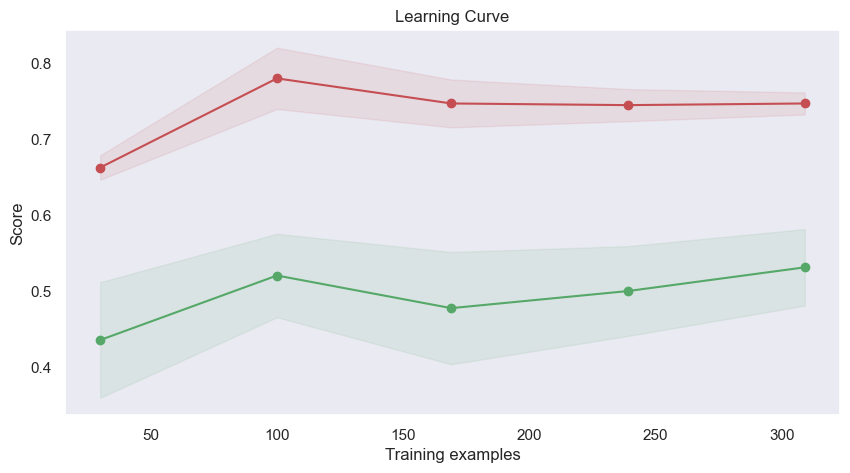

In [50]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, title, X, y):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    return plt


title = "Learning Curve"
plot_learning_curve(best_model, title, X_train, y_train)

plt.show()

#### Demo

In [54]:
# jobs = ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Engineer']
def init_inputs() -> dict :
    cols = list(X.columns)
    input_features = {}
    for col in cols:
        input_features[col] = 0
    return input_features

def predict_salary(input_features: dict, model) -> int:
    input_features = list(input_features.values())
    features = np.array(input_features).reshape(1, -1)
    
    predicted_salary = model.predict(features)
    
    return round(predicted_salary[0], 2)

In [55]:
inputs_features = init_inputs()
inputs_features

{'work_year': 0,
 'experience_level': 0,
 'remote_ratio': 0,
 'company_size': 0,
 'employment_type_Freelance': 0,
 'employment_type_Full-time': 0,
 'employment_type_Part-time': 0,
 'job_title_Data Engineer': 0,
 'job_title_Data Scientist': 0,
 'job_title_Machine Learning Engineer': 0,
 'employee_residence_DE': 0,
 'employee_residence_GB': 0,
 'employee_residence_IN': 0,
 'employee_residence_Other': 0,
 'employee_residence_US': 0,
 'company_location_DE': 0,
 'company_location_GB': 0,
 'company_location_IN': 0,
 'company_location_Other': 0,
 'company_location_US': 0}

In [56]:
inputs_features['work_year'] = 2022
inputs_features['job_title_Data Scientist'] = 1
inputs_features['employment_type_Full-time'] = 1
inputs_features['employee_residence_US'] = 1
inputs_features['company_location_US'] = 1

print(f"The predicted salary is: {predict_salary(inputs_features, best_model)}")

The predicted salary is: 133733.05
